In [ ]:
!pip install --pre pycaret

In [ ]:
import pycaret
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('tabela_modelo.csv')
print(data.shape)
data.head()

(596386, 12)


,client_id,regional,connection_type,installment_status,total_debt,total_bills,disconnection_executed,collected,log_total_debt,categoria_debito,class_client,disconnection_month
0,0,1,single-phase connection,complete,662.62,4,circuit_break,0,2.821265,E,A,2017-03
1,2,1,biphasic connection,Other,352.56,1,circuit_break,0,2.547233,D,A,2017-03
2,3,1,biphasic connection,complete,699.23,9,pole,0,2.844620,E,A,2017-03
3,4,2,biphasic connection,complete,484.10,4,circuit_break,0,2.684935,E,A,2017-03
4,5,3,single-phase connection,current,160.90,1,circuit_break,0,2.206556,C,B,2017-03


In [ ]:
data = data.drop(['client_id', 'total_debt', 'categoria_debito', 'disconnection_month'], axis=1).reset_index(drop=True)
print(data.shape)
data.head()

(596386, 8)


,regional,connection_type,installment_status,total_bills,disconnection_executed,collected,log_total_debt,class_client
0,1,single-phase connection,complete,4,circuit_break,0,2.821265,A
1,1,biphasic connection,Other,1,circuit_break,0,2.547233,A
2,1,biphasic connection,complete,9,pole,0,2.844620,A
3,2,biphasic connection,complete,4,circuit_break,0,2.684935,A
4,3,single-phase connection,current,1,circuit_break,0,2.206556,B


In [ ]:
from pycaret.classification import *
s = setup(data, target = 'collected', fold=5, categorical_features=['regional', 'connection_type', 'installment_status', 'disconnection_executed', 'class_client'])

,Description,Value
0,Session id,898
1,Target,collected
2,Target type,Binary
3,Original data shape,"(596386, 8)"
4,Transformed data shape,"(596386, 20)"
5,Transformed train set shape,"(417470, 20)"
6,Transformed test set shape,"(178916, 20)"
7,Numeric features,3
8,Categorical features,5
9,Preprocess,True


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:15:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6876,0.7574,0.6851,0.6410,0.6623,0.3722,0.3729,11.4280
gbc,Gradient Boosting Classifier,0.6863,0.7549,0.6700,0.6433,0.6564,0.3680,0.3683,38.3140
ada,Ada Boost Classifier,0.6800,0.7443,0.6535,0.6391,0.6462,0.3542,0.3543,17.6900
lr,Logistic Regression,0.6623,0.7310,0.6596,0.6140,0.6360,0.3218,0.3225,27.0680
ridge,Ridge Classifier,0.6540,0.0000,0.6233,0.6109,0.6170,0.3015,0.3016,6.2720
lda,Linear Discriminant Analysis,0.6540,0.7214,0.6237,0.6108,0.6172,0.3017,0.3017,8.6180
knn,K Neighbors Classifier,0.6491,0.6975,0.6070,0.6077,0.6074,0.2901,0.2901,1584.3280
svm,SVM - Linear Kernel,0.6375,0.0000,0.5654,0.6006,0.5825,0.2628,0.2631,7.1220
nb,Naive Bayes,0.6363,0.6994,0.7826,0.5678,0.6581,0.2901,0.3074,7.8560
qda,Quadratic Discriminant Analysis,0.6268,0.6810,0.6696,0.5742,0.6142,0.2578,0.2649,7.7060


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6876,0.7574,0.6851,0.6410,0.6623,0.3722,0.3729,11.4280
gbc,Gradient Boosting Classifier,0.6863,0.7549,0.6700,0.6433,0.6564,0.3680,0.3683,38.3140
ada,Ada Boost Classifier,0.6800,0.7443,0.6535,0.6391,0.6462,0.3542,0.3543,17.6900
lr,Logistic Regression,0.6623,0.7310,0.6596,0.6140,0.6360,0.3218,0.3225,27.0680
ridge,Ridge Classifier,0.6540,0.0000,0.6233,0.6109,0.6170,0.3015,0.3016,6.2720
lda,Linear Discriminant Analysis,0.6540,0.7214,0.6237,0.6108,0.6172,0.3017,0.3017,8.6180
knn,K Neighbors Classifier,0.6491,0.6975,0.6070,0.6077,0.6074,0.2901,0.2901,1584.3280
svm,SVM - Linear Kernel,0.6375,0.0000,0.5654,0.6006,0.5825,0.2628,0.2631,7.1220
nb,Naive Bayes,0.6363,0.6994,0.7826,0.5678,0.6581,0.2901,0.3074,7.8560
qda,Quadratic Discriminant Analysis,0.6268,0.6810,0.6696,0.5742,0.6142,0.2578,0.2649,7.7060


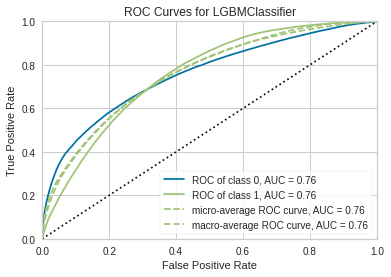

In [ ]:
plot_model(best)

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…